In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout
from keras.layers import BatchNormalization, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
data = os.listdir('../input/flowers/flowers/')
n_classes = len(data)
print(n_classes,'classes', ':', data)

5 classes : ['rose', 'dandelion', 'daisy', 'sunflower', 'tulip']


In [3]:
X_data = []
y_data = []

# Extract images and their corresponding labels
for classe in data :
    for image in os.listdir('../input/flowers/flowers/'+str(classe)):
        if image.endswith('.jpg'):
            img = Image.open('../input/flowers/flowers/'+str(classe)+'/'+image)
            img = img.resize((224,224),Image.ANTIALIAS)
            
            # Convert img to np array
            img = np.array(img)
            classe_index = data.index(classe)
            X_data.append(img)
            y_data.append(classe_index)

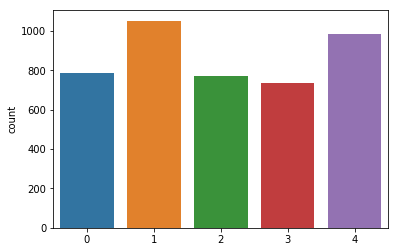

In [4]:
# Count samples per class
sns.countplot(y_data)

In [5]:
X = np.array(X_data)
X = X.astype('float32')/255.0
print(X.shape)

(4323, 224, 224, 3)


In [6]:
y = np.array(y_data)
y = to_categorical(y_data,n_classes)
print(y.shape)

(4323, 5)


In [7]:
n_samples = X.shape[0]
img_dim = (224,224,3)
batch_size = 64
epochs = 50
n_val_samples = 0.2 * n_samples
n_train_samples = 0.8 * n_samples

In [8]:
model = Sequential()
model.add(Conv2D(32, (5,5),padding = 'same',activation ='relu',
                 input_shape = img_dim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(n_classes, activation = "softmax"))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='rmsprop')

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       73856     
__________

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
batch_size = 64
epochs = 50
n_val_samples = 0.2 * n_samples
n_train_samples = 0.8 * n_samples

In [13]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=20)
                                  
train_generator = train_datagen.flow(x=X_train,
                                     batch_size=batch_size,
                                     y=y_train)                                

In [14]:
early_stop = EarlyStopping(patience=5,monitor='val_acc')

hist = model.fit_generator(train_generator,
                 callbacks=[early_stop],
                 validation_data=(X_test,y_test),
                 validation_steps=n_val_samples//batch_size,
                 steps_per_epoch=n_samples//batch_size, 
                 epochs=epochs,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
67/67 [==============================] - 51s 764ms/step - loss: 5.6060 - acc: 0.2862 - val_loss: 1.3532 - val_acc: 0.3977
Epoch 2/50
67/67 [==============================] - 48s 719ms/step - loss: 1.3346 - acc: 0.4594 - val_loss: 1.4051 - val_acc: 0.4312
Epoch 3/50
67/67 [==============================] - 48s 720ms/step - loss: 1.1419 - acc: 0.5492 - val_loss: 1.0774 - val_acc: 0.5618
Epoch 4/50
67/67 [==============================] - 48s 721ms/step - loss: 1.0590 - acc: 0.5937 - val_loss: 1.1506 - val_acc: 0.5769
Epoch 5/50
67/67 [==============================] - 48s 709ms/step - loss: 1.0042 - acc: 0.6240 - val_loss: 0.9962 - val_acc: 0.6451
Epoch 6/50
67/67 [==============================] - 48s 719ms/step - loss: 0.8924 - acc: 0.6538 - val_loss: 0.9438 - val_acc: 0.6231
Epoch 7/50
67/67 [==============================] - 48s 722ms/step - loss: 0.8716 - acc: 0.6737 - val_loss: 0.9232 - val_acc: 0.6462
Epoch 8/50
67/67 [===

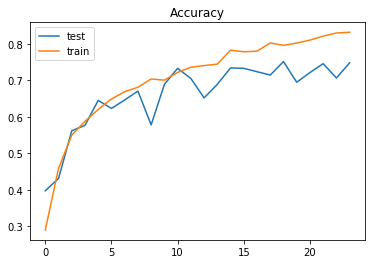

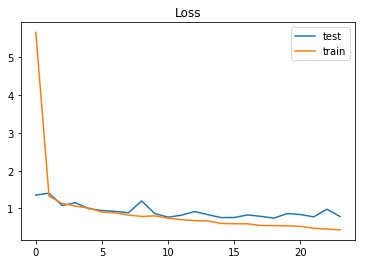

In [15]:
# Plot acc and val_acc curves
plt.title('Accuracy')
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['acc'])
plt.legend(['test','train'])
plt.show()

# Plot loss and val_loss curves
plt.title('Loss')
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.legend(['test','train'])
plt.show()

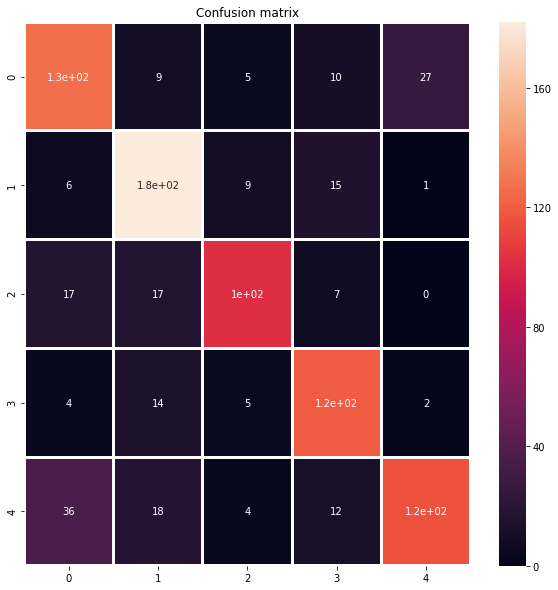

In [16]:
# Make predictions from test set
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test,axis=1)

# Plot confusion matrix
plt.figure(figsize=(10,10))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,linewidth=2)

In [17]:
from sklearn.metrics import classification_report

# Compute precision recall & f1-score
print('Classification report : \n', classification_report(y_true, y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       178
           1       0.76      0.85      0.80       213
           2       0.82      0.71      0.76       143
           3       0.73      0.83      0.78       145
           4       0.79      0.62      0.70       186

   micro avg       0.75      0.75      0.75       865
   macro avg       0.75      0.75      0.75       865
weighted avg       0.75      0.75      0.75       865



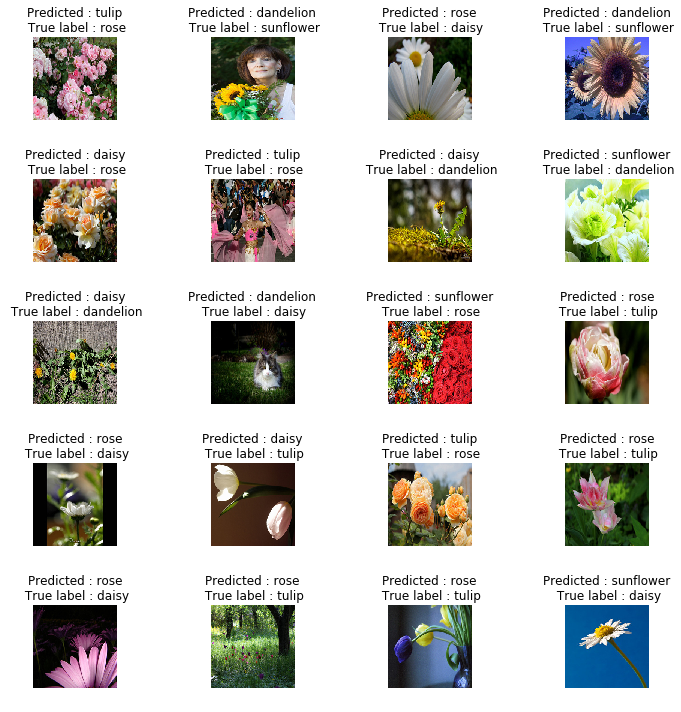

In [18]:
j = 0
X_misclassified = []
wrong_labels = []
true_labels =[]

# Get 20 misclassified samples 
for pred, true_classe in zip(y_pred,y_true):
    if pred != true_classe:
        wrong_labels.append(pred)
        true_labels.append(true_classe)
        X_misclassified.append(X_test[j])
        
        if len(wrong_labels)==20:
            break
    j+=1
        
# Plot misclassified samples and their true labels   
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.title('Predicted : ' +str(data[wrong_labels[i]])
              +'\n True label : '+str(data[true_labels[i]]))
    plt.axis('off')
    plt.imshow(X_misclassified[i])
plt.tight_layout()
